In [1]:
import pandas as pd

relacoes_entre_cnpjs = pd.read_csv(
    '/home/pedro/code/trabalho/M04/M04_2021/data/input/relacao_cnpjs.csv',
    header=None,
    dtype=str,
    sep=' '
)

informacoes_licitacoes = pd.read_csv(
    '/home/pedro/code/trabalho/M04/M04_2021/data/input/infos_licitacoes.csv',
    dtype=str,
    sep=';'
)

cnpjs_por_licitacao = pd.read_csv(
    '/home/pedro/code/trabalho/M04/M04_2021/data/input/licitacoes_cnpjs_licitantes.csv',
    dtype=str,
    sep=';'
)

# Encontrando cliques de cnpjs relacionados para licitacoes

## Selecionando os CNPJs correspondentes a licitacao escolhida

In [2]:
licitacao = '892265'
cnpjs_licitantes = cnpjs_por_licitacao.loc[cnpjs_por_licitacao['seq_dim_licitacao'] == licitacao]
cnpjs_licitantes = cnpjs_licitantes['num_documento']
cnpjs_licitantes


48280     26928083000177
90454     18745070000134
90455     14810292000132
90456     17327048000101
90457     11650569000119
               ...      
397604    15163783000100
397605    26930124000160
420611    18723052000151
420612    26929772000104
420613    11101200000157
Name: num_documento, Length: 64, dtype: object

## Criacao do Grafo de CNPJs

In [3]:
import networkx as nx

G = nx.Graph()

# deve existir uma forma mais inteligente de fazer isso usando funcoes nativas
for cnpj in cnpjs_licitantes:
    G.add_node(cnpj)
    relacoes_do_cnpj = relacoes_entre_cnpjs.loc[relacoes_entre_cnpjs[0] == cnpj]

    for relacao in relacoes_do_cnpj.values:
        if relacao[1] in cnpjs_licitantes.values:
            G.add_edge(relacao[0], relacao[1])

cliques = list(nx.find_cliques(G))
tamanho_cliques = [len(clique) for clique in cliques]

## Algumas informacoes do grafo para essa licitacao:

### Clique de maior tamanho (max clique?)

In [4]:
max(tamanho_cliques)

38

### Densidade

In [5]:
nx.density(G)

0.3492063492063492

### Numero de arestas

In [6]:
len(list(G.edges))

704

In [7]:
G.number_of_edges()

704

### Numero de nodos

In [8]:
len(list(G.nodes))

64

In [9]:
G.number_of_nodes()

64

Para essa licitacao, primeira linha do arquivo RELATORIO_GRAFOS_POR_LICITACAO.csv, os valores encontrados pelo script sao:

- Max clique: 38

- Arestas: 64

- Vertices: 704

- Densidade: 0,349206349206349


### Visualizando o grafo para a licitacao

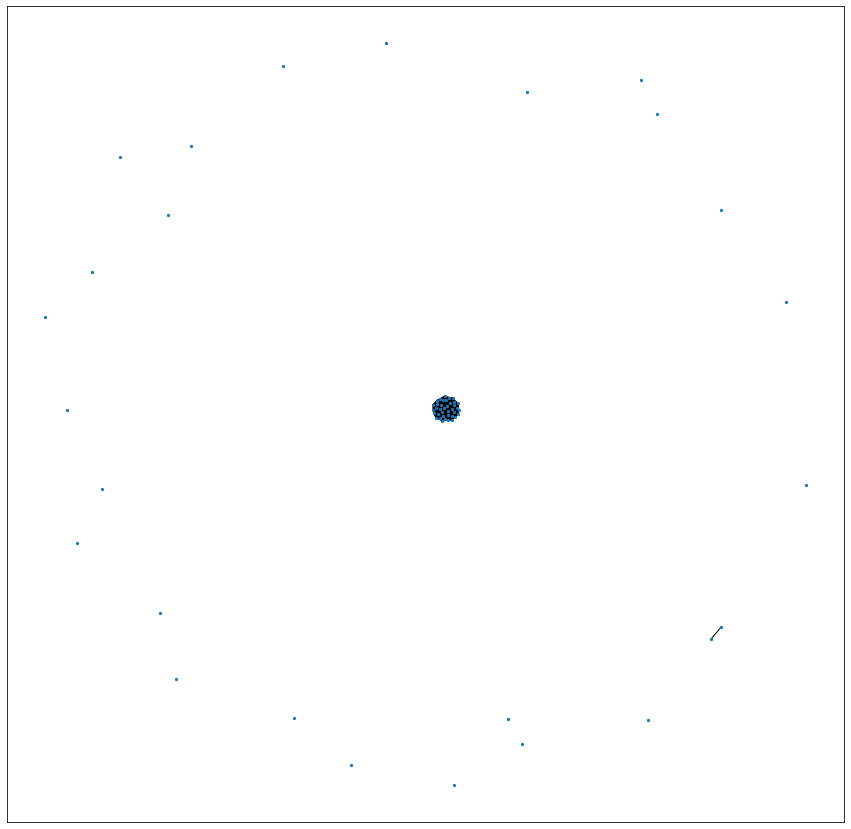

In [10]:
import matplotlib.pyplot as plt

def plota_grafo(grafo: nx.Graph) -> plt.figure:
    """Plota o grafo.
    """    
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(grafo)
    nx.draw_networkx_nodes(grafo, pos, node_size=5)
    nx.draw_networkx_edges(grafo, pos, width=1)
    plt.show()

plota_grafo(G)

In [20]:
def plota_grafo_licitacao(id_licitacao: str):
    cnpjs_licitantes = cnpjs_por_licitacao.loc[cnpjs_por_licitacao['seq_dim_licitacao'] == id_licitacao]
    cnpjs_licitantes = cnpjs_licitantes['num_documento']

    G = nx.Graph()

    # deve existir uma forma mais inteligente de fazer isso usando funcoes nativas
    for cnpj in cnpjs_licitantes:
        G.add_node(cnpj)
        relacoes_do_cnpj = relacoes_entre_cnpjs.loc[relacoes_entre_cnpjs[0] == cnpj]

        for relacao in relacoes_do_cnpj.values:
            if relacao[1] in cnpjs_licitantes.values:
                G.add_edge(relacao[0], relacao[1])

    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=5)
    nx.draw_networkx_edges(G, pos, width=1)
    plt.show()

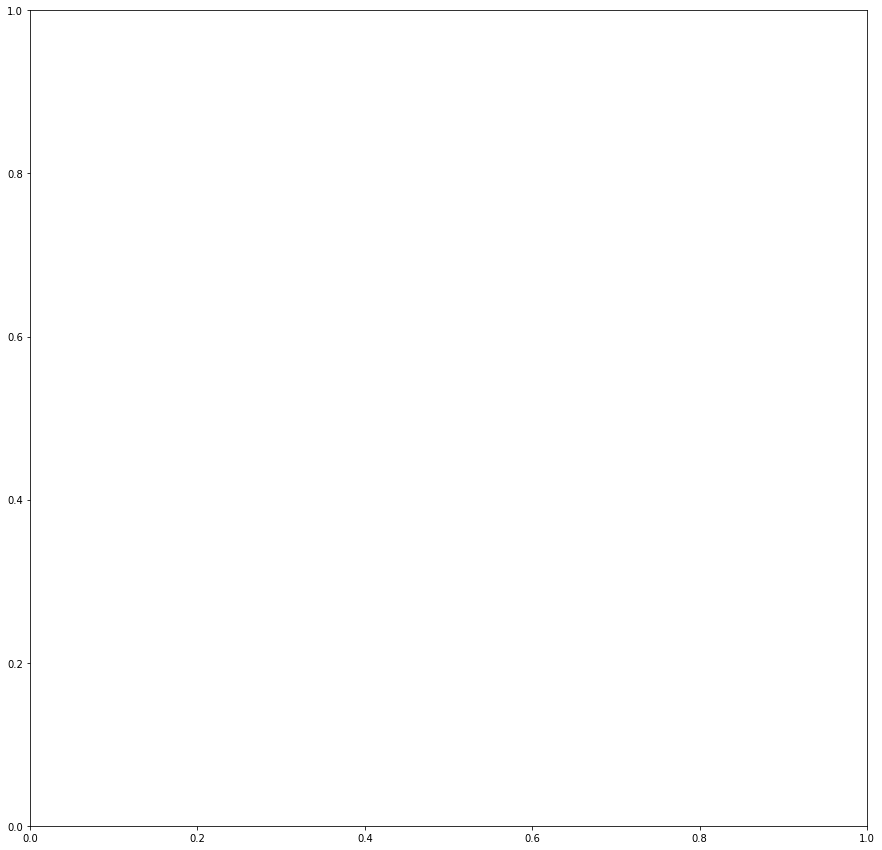

In [21]:
plota_grafo_licitacao('89226')

## Compilando em uma função

In [11]:
def sumariza_licitacao(id_licitacao: str):
    cnpjs_licitantes = cnpjs_por_licitacao.loc[cnpjs_por_licitacao['seq_dim_licitacao'] == id_licitacao]
    cnpjs_licitantes = cnpjs_licitantes['num_documento']

    G = nx.Graph()

    # deve existir uma forma mais inteligente de fazer isso usando funcoes nativas
    for cnpj in cnpjs_licitantes:
        G.add_node(cnpj)
        relacoes_do_cnpj = relacoes_entre_cnpjs.loc[relacoes_entre_cnpjs[0] == cnpj]

        for relacao in relacoes_do_cnpj.values:
            if relacao[1] in cnpjs_licitantes.values:
                G.add_edge(relacao[0], relacao[1])

    cliques = list(nx.find_cliques(G))
    tamanho_cliques = [len(clique) for clique in cliques]
    clique_max = max(tamanho_cliques)
    densidade = nx.density(G)
    arestas = G.number_of_edges()
    nodos = G.number_of_nodes()

    print('Analisando licitacao ', id_licitacao)
    print('Clique max:', clique_max)
    print('Densidade:', densidade)
    print('CNJPs relacionados:', arestas)
    print('CNPJs participantes:', nodos)    

In [12]:
sumariza_licitacao('892265')

Analisando licitacao  892265
Clique max: 38
Densidade: 0.3492063492063492
CNJPs relacionados: 704
CNPJs participantes: 64
